In [30]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = yf.download('WIPRO.NS')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,1.1250,1.1250,1.1250,1.1250,0.910127,19999
1996-01-02,1.0375,1.0375,1.0375,1.0375,0.839340,39999
1996-01-03,1.0750,1.0750,1.0750,1.0750,0.869677,19999
1996-01-04,1.0750,1.0750,1.0750,1.0750,0.869677,119999
1996-01-05,1.0750,1.0750,1.0750,1.0750,0.869677,0


In [4]:
df.shape

(6822, 6)

In [5]:
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
print('setup complete')

setup complete


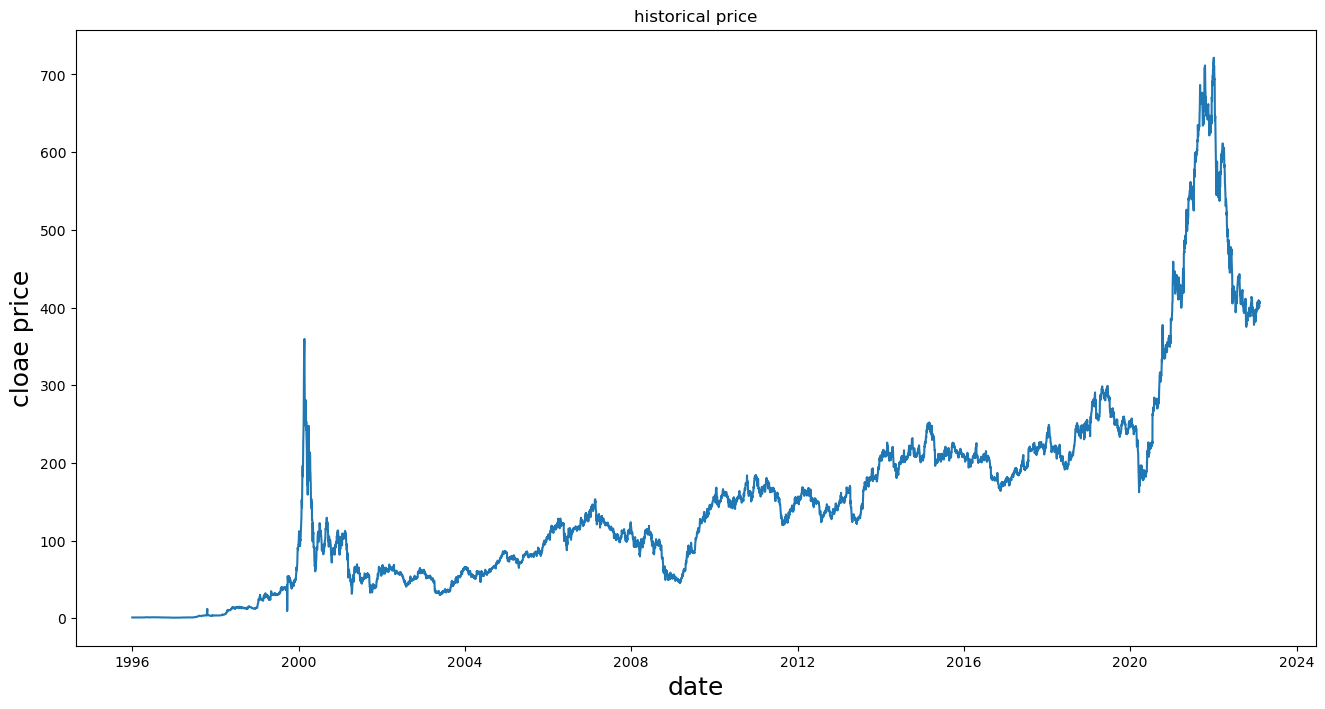

In [7]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('cloae price',fontsize=18)
plt.show()

In [8]:
dta = df.filter(['Close'])
df = np.array(dta).reshape(-1,1)
df

array([[  1.125     ],
       [  1.03750002],
       [  1.07500005],
       ...,
       [406.75      ],
       [408.29998779],
       [405.79998779]])

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))
scaled_df

array([[4.96023166e-04],
       [3.74618934e-04],
       [4.26649366e-04],
       ...,
       [5.63291512e-01],
       [5.65442085e-01],
       [5.61973392e-01]])

In [10]:
training_dta_len = math.ceil(len(scaled_df)*0.8)
training_dta_len

5458

In [11]:
train_dta = scaled_df[0:training_dta_len,:]
x_train = []
y_train = []
for i in range(60,len(train_dta)):
    x_train.append(train_dta[i-60:i,0])
    y_train.append(train_dta[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00049602, 0.00037462, 0.00042665, 0.00042665, 0.00042665,
       0.00042665, 0.00042665, 0.00042873, 0.00042665, 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00041971, 0.00039196,
       0.00041971, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.00039196, 0.00038   , 0.00038   , 0.00038   , 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.0004263 , 0.0004263 , 0.0004263 , 0.0004263 , 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00044399, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00048735,
       0.00048735, 0.00049602, 0.00039214, 0.00039214, 0.00041277,
       0.00046134, 0.00046151, 0.00046151, 0.00046151, 0.00046151])]
[0.00046150960565661376]



In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, ( y_train.shape[0], x_train.shape[1],1))
x_train.shape

(5398, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=40,epochs=25)

Epoch 1/25
135/135 [==============================] - 28s 113ms/step - loss: 7.4838e-04
Epoch 2/25
135/135 [==============================] - 15s 113ms/step - loss: 1.2904e-04
Epoch 3/25
135/135 [==============================] - 15s 114ms/step - loss: 1.0877e-04
Epoch 4/25
135/135 [==============================] - 16s 117ms/step - loss: 8.8989e-05
Epoch 5/25
135/135 [==============================] - 16s 119ms/step - loss: 8.2322e-05
Epoch 6/25
135/135 [==============================] - 16s 118ms/step - loss: 8.2116e-05
Epoch 7/25
135/135 [==============================] - 16s 116ms/step - loss: 7.2780e-05
Epoch 8/25
135/135 [==============================] - 12s 88ms/step - loss: 7.2747e-05
Epoch 9/25
135/135 [==============================] - 7s 55ms/step - loss: 7.1056e-05
Epoch 10/25
135/135 [==============================] - 8s 60ms/step - loss: 5.9470e-05
Epoch 11/25
135/135 [==============================] - 7s 54ms/step - loss: 5.9428e-05
Epoch 12/25
135/135 [================

In [17]:
test_data = scaled_df[training_dta_len - 60:,:]
x_test = []
y_test = df[training_dta_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [18]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [19]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)
rmse = np.sqrt(np.mean(prediction-y_test)**2)
rmse

43/43 [==============================] - 2s 14ms/step


15.456508524606654

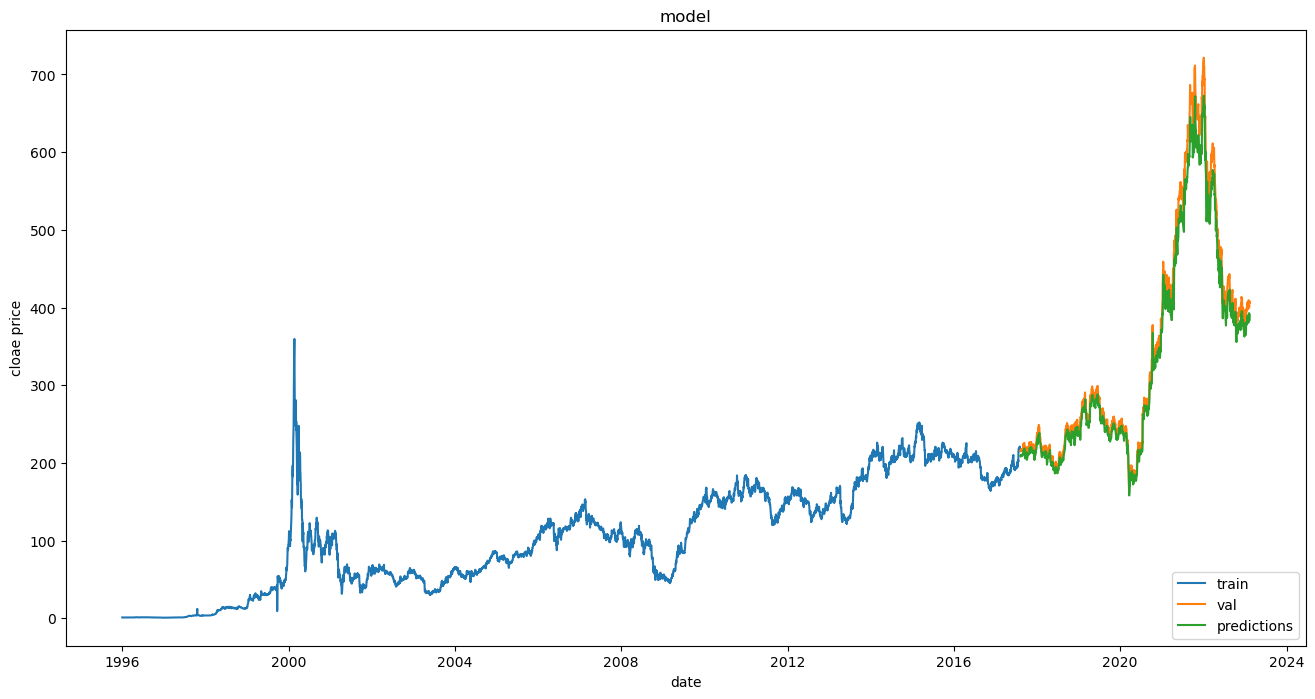

In [31]:
train = dta[:training_dta_len]
val = dta[training_dta_len:]
val['predictions']=prediction
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('date')
plt.ylabel('cloae price')
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train','val','predictions'],loc='lower right')
plt.show()

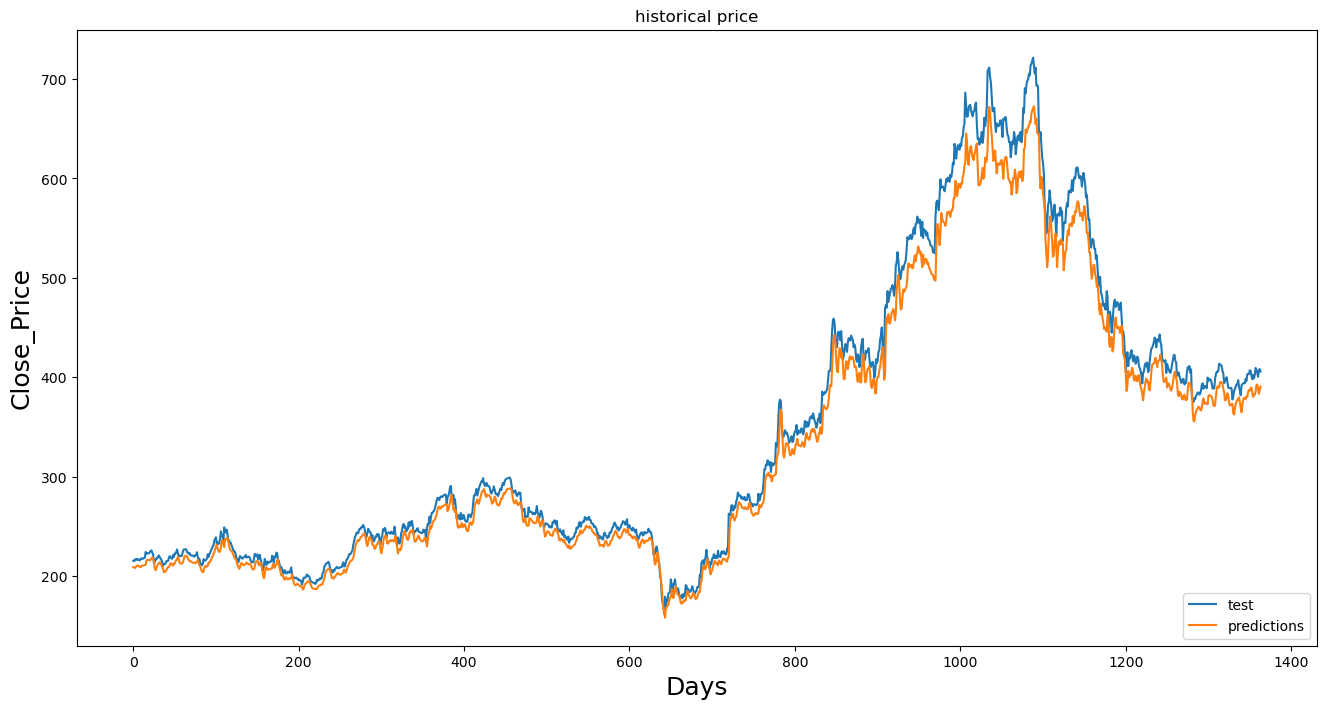

In [27]:
test = df[training_dta_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(prediction)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()
